In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

a4_dims = (11.7, 8.27)
sns.set(font_scale = 2)

In [2]:
fa_17 = pd.read_csv('Fa17UD75_hashed.csv')
fa_18 = pd.read_csv('Fa18UD75_hashed.csv')
fa_19 = pd.read_csv('Fa19UD75_hashed.csv')
sp_18 = pd.read_csv('Sp18UD75_hashed.csv')
sp_19 = pd.read_csv('Sp19UD75_hashed.csv')

fa_19_allls = pd.read_csv('Fa19AllLS_hashed.csv')
fa_19_nomajor = pd.read_csv('Fa19NoMajor_hashed.csv')

ad_fa_19_ycbm = pd.read_csv('SuFa19YCBM_hashed.csv')
ad_fa_19_di = pd.read_csv('Fa19DI_hashed.csv')

fa_17['Semester Year Name Concat'] = ['2017 Fall' for i in range(fa_17.shape[0])]

In [3]:
"""Merged data(intersection) from all semesters. Not clean"""

ay_17_18 = pd.merge(fa_17, sp_18, how='left', on=['Student Id'])
ay_18_19 = pd.merge(fa_18, sp_19, how='inner', on=['Student Id'])
ay_17_19 = pd.merge(ay_17_18, ay_18_19, how='inner', on=['Student Id'])
ay_all = pd.merge(ay_17_19, fa_19, how='inner', on=['Student Id'])

There are duplicates in all the datasets. Some of these duplicates are carbon copies, however others only differ in their Academic Department Short Nm-Major. This difference could be due to double major or overlap of departments.(eg: History and Near Eastern Studies, Mathematics and MCB). 

**Questions:**
1) Why do some students have an academic department if this data is about students with UD75hold? (In case the student declared a major later in the semester when the hold was placed does their data show up in these datasets?)

In [4]:
fa_17_d = fa_17.drop_duplicates()
#fa_17_d['Student Id'].value_counts()
fa_17_d.loc[fa_17_d['Student Id'] == fa_17_d['Student Id'].value_counts().index[2], ]

,Unnamed: 0,Student Id,Entry Status Cd,Educ Non Exam Level Cd,Academic Department Short Nm - Major,Cum Gpa No,Cum Ucb Letgrd Units No,Eot Term Letgrd Units Complete,Eot Term Pnp Units Completed,Eot Trm Tot Letgrd Grd Pnts No,Semester Year Name Concat
820,820,89a9664de501bd7368094f4a4be0e907088cb147294781...,NF,3,Mathematics,2.937,88.0,13.0,0.0,35.8,2017 Fall
821,821,89a9664de501bd7368094f4a4be0e907088cb147294781...,NF,3,Molecular & Cell Biology,2.937,88.0,13.0,0.0,35.8,2017 Fall


Merging L&S Undeclared data:

In [5]:
ad_fa_19_ycbm

,Unnamed: 0,Profile,Booking Made,Start,End,Cancelled,Cancelled At,Cancellation Reason,Booker Timezone,Booker Start,...,L1,L2,L3,L4,L5,L6,L7,L8,L9,L10
0,0,clsappt,2019-07-22 15:59:00,2019-07-23 15:30:00,2019-07-23 16:00:00,False,NaN,NaN,US/Pacific,2019-07-23 15:30:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,clsappt,2019-07-24 13:00:00,2019-07-24 13:30:00,2019-07-24 14:00:00,False,NaN,NaN,US/Pacific,2019-07-24 13:30:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,clsappt,2019-07-23 15:34:00,2019-07-24 16:00:00,2019-07-24 16:30:00,False,NaN,NaN,US/Pacific,2019-07-24 16:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,clsappt,2019-07-23 14:46:00,2019-07-25 10:00:00,2019-07-25 10:30:00,False,NaN,NaN,US/Pacific,2019-07-25 10:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,clsappt,2019-07-23 13:29:00,2019-07-25 11:00:00,2019-07-25 11:30:00,False,NaN,NaN,US/Pacific,2019-07-25 11:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1343,1343,clsappt,2020-01-02 09:25:00,2020-01-03 10:00:00,2020-01-03 10:30:00,False,NaN,NaN,US/Pacific,2020-01-03 10:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1344,1344,clsappt,2020-01-02 09:29:00,2020-01-03 10:30:00,2020-01-03 11:00:00,False,NaN,NaN,US/Pacific,2020-01-03 10:30:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1345,1345,clsappt,2020-01-02 09:40:00,2020-01-03 13:30:00,2020-01-03 14:00:00,False,NaN,NaN,US/Pacific,2020-01-03 13:30:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1346,1346,clsappt,2020-01-02 15:11:00,2020-01-03 14:00:00,2020-01-03 14:30:00,False,NaN,NaN,US/Pacific,2020-01-03 14:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
fa_17_clean = fa_17.loc[fa_17['Academic Department Short Nm - Major'] == 'L&S Undeclared']
fa_18_clean = fa_18.loc[fa_18['Academic Department Short Nm - Major'] == 'L&S Undeclared']
fa_19_clean = fa_19.loc[fa_19['Academic Department Short Nm - Major'] == 'L&S Undeclared']
sp_18_clean = sp_18.loc[sp_18['Academic Department Short Nm - Major'] == 'L&S Undeclared']
sp_19_clean = sp_19.loc[sp_19['Academic Department Short Nm - Major'] == 'L&S Undeclared']

In [7]:
sp_18_u = sp_18_clean.loc[~sp_18_clean["Student Id"].isin(fa_17["Student Id"]),]
ay_17_18_clean = pd.concat([fa_17_clean, sp_18_u])

fa_18_u = fa_18_clean.loc[~fa_18_clean["Student Id"].isin(ay_17_18_clean["Student Id"]),]
ay_17_18_clean = pd.concat([ay_17_18_clean, fa_18_u])

sp_19_u = sp_19_clean.loc[~sp_19_clean["Student Id"].isin(ay_17_18_clean["Student Id"]),]
ay_17_19_clean = pd.concat([ay_17_18_clean, sp_19_u])

fa_19_u = fa_19_clean.loc[~fa_19_clean["Student Id"].isin(ay_17_19_clean["Student Id"]),]
ay_all_clean = pd.concat([ay_17_19_clean, fa_19_u])

ay_all_clean

,Unnamed: 0,Student Id,Entry Status Cd,Educ Non Exam Level Cd,Academic Department Short Nm - Major,Cum Gpa No,Cum Ucb Letgrd Units No,Eot Term Letgrd Units Complete,Eot Term Pnp Units Completed,Eot Trm Tot Letgrd Grd Pnts No,Semester Year Name Concat
1,1,09b1837a61be0cb2675dba8f0b6ebb3e01536449225c34...,AD,3,L&S Undeclared,1.534,17.0,8.0,0.0,21.2,2017 Fall
3,3,e6f625c719c35d3bf0b230121547db2c64b73c94778b0b...,NF,4,L&S Undeclared,2.635,70.0,13.0,0.0,39.1,2017 Fall
5,5,979fbd753328c3a0543a64dfcbf7c3c117bb947faab0d1...,NF,3,L&S Undeclared,2.310,39.0,6.0,0.0,11.4,2017 Fall
6,6,7efa9d1237dd4e516c51d483b71c58fc348b433287c3bb...,NF,-,L&S Undeclared,2.169,80.0,8.0,0.0,13.2,2017 Fall
7,7,bbe2b0571db3c2d50fdf3dce4d5b659d9aa7171966b096...,AD,4,L&S Undeclared,2.717,23.0,7.0,2.0,21.3,2017 Fall
...,...,...,...,...,...,...,...,...,...,...,...
1348,1348,cd519b53d0dab6a785a82e37751d70fe822a24f5905184...,NF,2,L&S Undeclared,3.028,35.0,4.0,4.0,12.0,2019 Fall
1349,1349,632afb53bd5eeda1e82b64371dc959dddb099fe73836d5...,NF,2,L&S Undeclared,3.062,54.0,10.0,3.0,27.4,2019 Fall
1352,1352,68f847a091a65bf0b4695b23d676b1bd228f360be07968...,AD,3,L&S Undeclared,2.461,13.0,3.0,6.0,6.0,2019 Fall
1353,1353,44587860a4184da163fabbd50a85e9bec894155c3fcc59...,AD,3,L&S Undeclared,2.825,27.0,12.0,2.0,33.2,2019 Fall


C:\Users\viraj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\viraj\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\viraj\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


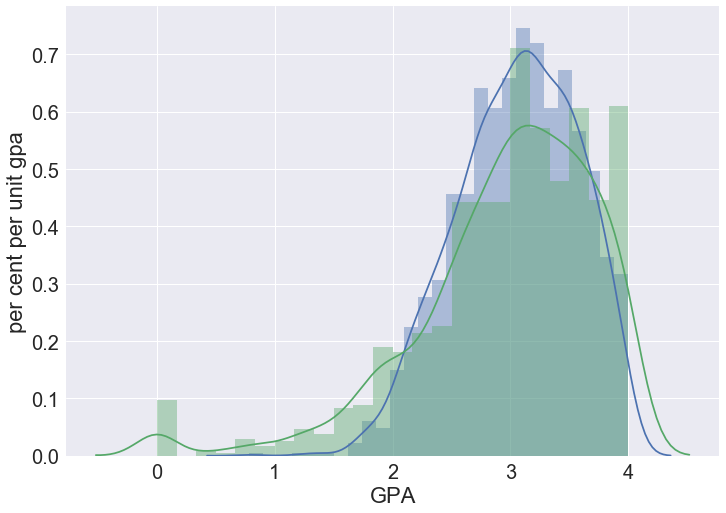

In [8]:
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.distplot(ay_all_clean.loc[ay_all_clean['Entry Status Cd'] == 'NF',['Cum Gpa No']])
sns.distplot(ay_all_clean.loc[ay_all_clean['Entry Status Cd'] == 'AD',['Cum Gpa No']])
ax.set(xlabel='GPA', ylabel='per cent per unit gpa')
pyplot.show()

C:\Users\viraj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\viraj\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\viraj\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


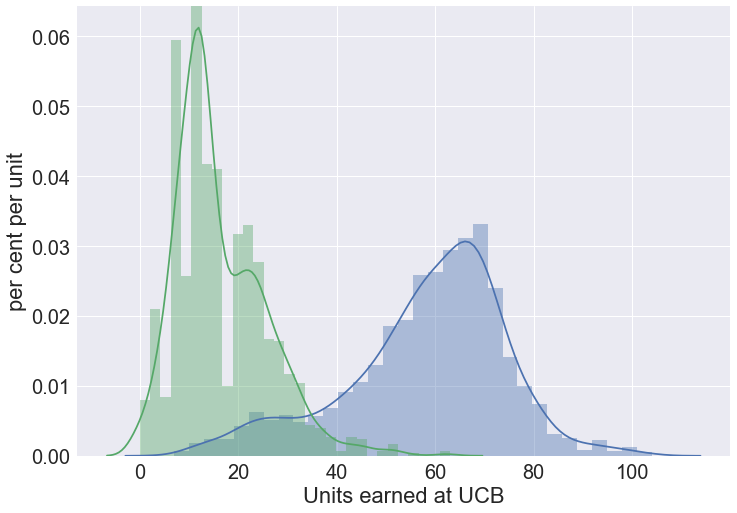

In [9]:
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.distplot(ay_all_clean.loc[ay_all_clean['Entry Status Cd'] == 'NF',['Cum Ucb Letgrd Units No']])
sns.distplot(ay_all_clean.loc[ay_all_clean['Entry Status Cd'] == 'AD',['Cum Ucb Letgrd Units No']])
ax.set(xlabel='Units earned at UCB', ylabel='per cent per unit')
pyplot.show()

C:\Users\viraj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\viraj\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\viraj\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


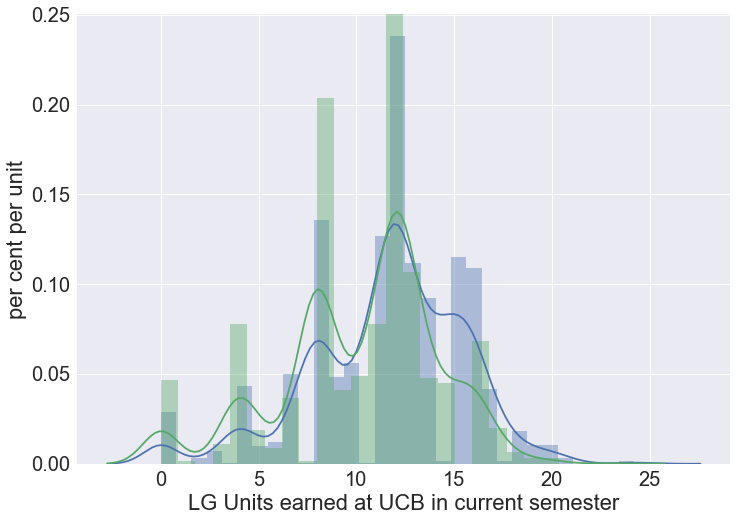

In [10]:
fig, ax = pyplot.subplots(figsize=a4_dims)
ay_all_clean_na = ay_all_clean.fillna(0)
ax = sns.distplot(ay_all_clean_na.loc[ay_all_clean_na['Entry Status Cd'] == 'NF',['Eot Term Letgrd Units Complete']])
sns.distplot(ay_all_clean_na.loc[ay_all_clean_na['Entry Status Cd'] == 'AD',['Eot Term Letgrd Units Complete']])
ax.set(xlabel='LG Units earned at UCB in current semester', ylabel='per cent per unit')
pyplot.show()

C:\Users\viraj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\viraj\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\viraj\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


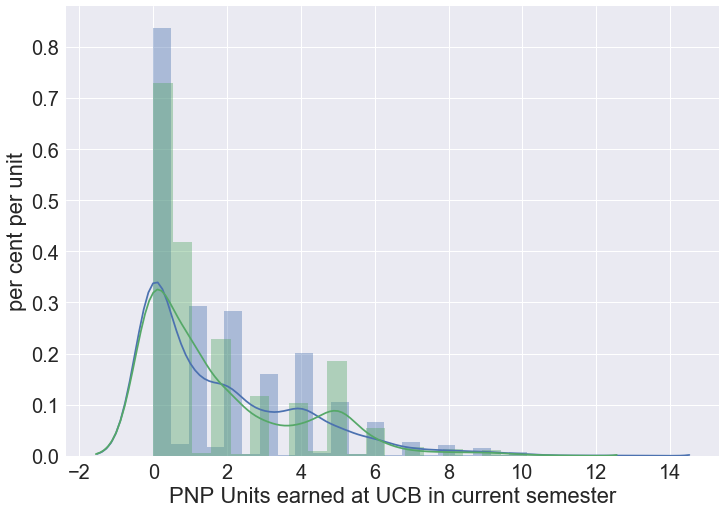

In [11]:
fig, ax = pyplot.subplots(figsize=a4_dims)
ay_all_clean_na = ay_all_clean.fillna(0)
ax = sns.distplot(ay_all_clean_na.loc[ay_all_clean_na['Entry Status Cd'] == 'NF',['Eot Term Pnp Units Completed']])
sns.distplot(ay_all_clean_na.loc[ay_all_clean_na['Entry Status Cd'] == 'AD',['Eot Term Pnp Units Completed']])
ax.set(xlabel='PNP Units earned at UCB in current semester', ylabel='per cent per unit')
pyplot.show()

C:\Users\viraj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\viraj\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\viraj\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


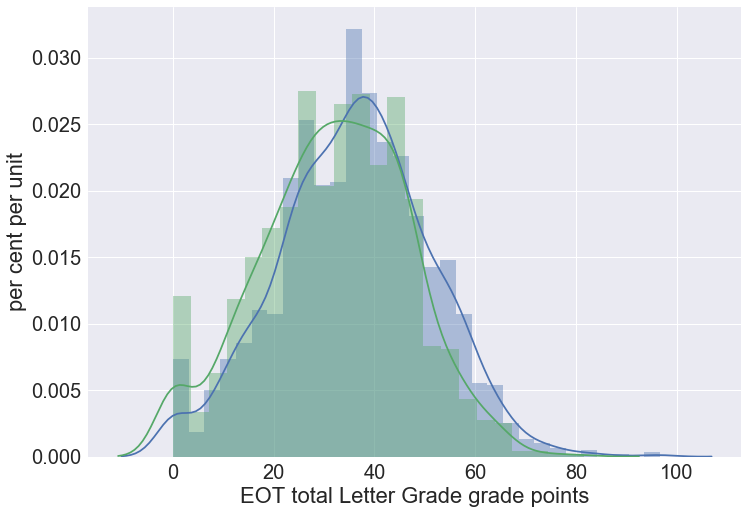

In [12]:
fig, ax = pyplot.subplots(figsize=a4_dims)
ay_all_clean_na = ay_all_clean.fillna(0)
ax = sns.distplot(ay_all_clean_na.loc[ay_all_clean_na['Entry Status Cd'] == 'NF',['Eot Trm Tot Letgrd Grd Pnts No']])
sns.distplot(ay_all_clean_na.loc[ay_all_clean_na['Entry Status Cd'] == 'AD',['Eot Trm Tot Letgrd Grd Pnts No']])
ax.set(xlabel='EOT total Letter Grade grade points', ylabel='per cent per unit')
pyplot.show()

**Analysis of individual datasets**

Fall 19 holds:

In [13]:
fa_19_clean

,Unnamed: 0,Semester Year Name Concat,Student Id,Entry Status Cd,Educ Non Exam Level Cd,Academic Department Short Nm - Major,Cum Gpa No,Cum Ucb Letgrd Units No,Eot Term Letgrd Units Complete,Eot Term Pnp Units Completed,Eot Trm Tot Letgrd Grd Pnts No
0,0,2019 Fall,c9f7ef9bc3828ecf9b6584aa212563066170a57ab54908...,NF,3,L&S Undeclared,3.306,29.0,8.0,NaN,28.0
4,4,2019 Fall,03cce505c03e25957db8ad8195d80d00927e884b02ef73...,NF,4,L&S Undeclared,2.096,75.0,8.0,NaN,25.2
5,5,2019 Fall,8f8818a974aa019bc8890d4f906f1925f8ad0717d8591c...,AD,4,L&S Undeclared,1.866,46.0,7.0,NaN,19.2
6,6,2019 Fall,ffebe9d0c5c2aecff95f3a5a8b43243ed4f3a27998d113...,AD,4,L&S Undeclared,2.688,18.0,2.0,1.0,6.0
7,7,2019 Fall,66cb5b5dd011b9fd8b97a52a58b9d8f4f495f0d39cb87f...,NF,3,L&S Undeclared,2.262,57.0,8.0,2.0,21.2
...,...,...,...,...,...,...,...,...,...,...,...
1349,1349,2019 Fall,632afb53bd5eeda1e82b64371dc959dddb099fe73836d5...,NF,2,L&S Undeclared,3.062,54.0,10.0,3.0,27.4
1350,1350,2019 Fall,cada315cd568caf3b68e5ea809701194adec190c271ae3...,AD,3,L&S Undeclared,2.797,35.0,11.0,NaN,33.9
1352,1352,2019 Fall,68f847a091a65bf0b4695b23d676b1bd228f360be07968...,AD,3,L&S Undeclared,2.461,13.0,3.0,6.0,6.0
1353,1353,2019 Fall,44587860a4184da163fabbd50a85e9bec894155c3fcc59...,AD,3,L&S Undeclared,2.825,27.0,12.0,2.0,33.2


**Breakdown by Entry Type**

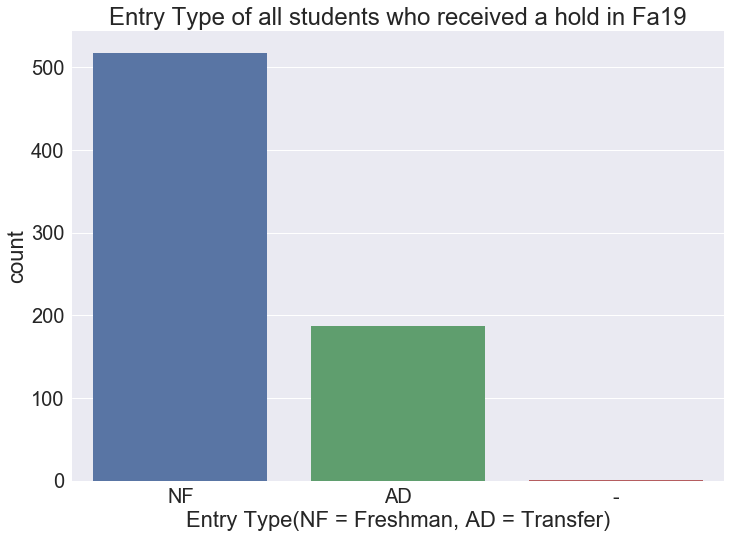

In [14]:
entry_status = pd.DataFrame(fa_19_clean['Entry Status Cd'].value_counts())
entry_status['Status'] = entry_status.index

fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.barplot(x = 'Status', y = 'Entry Status Cd', data = entry_status)
ax.set(xlabel='Entry Type(NF = Freshman, AD = Transfer)', ylabel='count', title = 'Entry Type of all students who received a hold in Fa19')
pyplot.show()

**Breakdown by current Education Level(Freshman, Sophomore, etc...)**

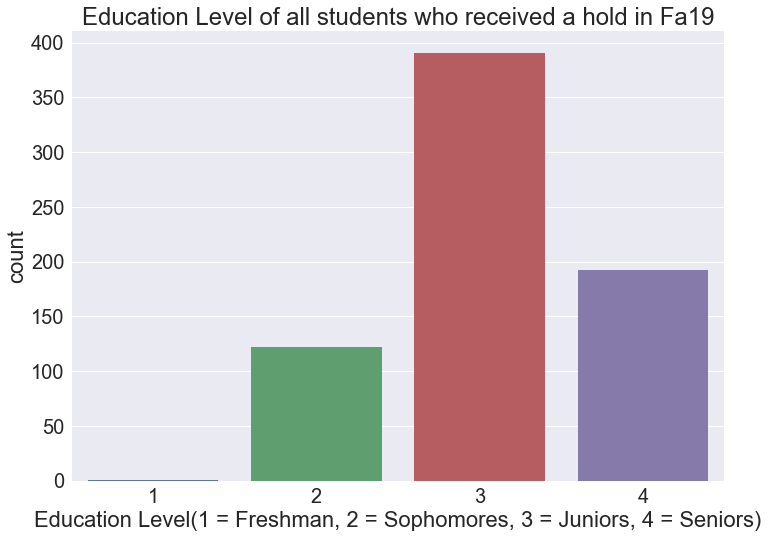

In [15]:
education_level = pd.DataFrame(fa_19_clean['Educ Non Exam Level Cd'].value_counts())
education_level['Level'] = education_level.index

fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.barplot(x = 'Level', y = 'Educ Non Exam Level Cd', data = education_level)
ax.set(xlabel='Education Level(1 = Freshman, 2 = Sophomores, 3 = Juniors, 4 = Seniors)', ylabel='count', title = 'Education Level of all students who received a hold in Fa19')
pyplot.show()

***Question: Does the SuFA19YCBM data include advising visits from summer 19? How does that affect our question of whether or not a student used the advising appointment resource?*** (Currently I'm only using the FA19DI data for advising related data questions)

In [16]:
ad_fa_19_di

,Unnamed: 0,Date,Check-in,SID,Reason,Adviser Meeting w/ Stu,Time Picked Up Stu\nPls Include AM/PM,Unnamed: 6
0,0,2019-09-11,14:49:00,a44508d1fac9c4236bdaeec70c2f00c3e47da50e9da1d9...,"Program planning, research units",Greg,14:53:00,NaN
1,1,2019-10-24,10:09:00,a57a1e6c1edbf59e45560fa8d259be68e6f34165b28848...,unapproved course schedule hold,*stu left,10:24:00,NaN
2,2,2019-08-21,13:07:00,f88d25b526310d06c9191010f14ca450ebc2bfb8f25bb5...,RCL for concurrent enrollment,Amy,13:15:00,NaN
3,3,2019-08-21,13:57:00,c6b4787438a9cd552265bc4162aacd83a3efd858c8067e...,"*Amy, enrollment questions",Amy,14:06:00,NaN
4,4,2019-08-22,09:08:00,3a690af62e29b4ab54bee797b5d621fc8bbdedfa7ae11f...,repeat questions,Amy,09:17:00,NaN
...,...,...,...,...,...,...,...,...
3833,3833,2019-08-28,14:11:00,e8a7581a73c70a654248e04dd6cdc3f4722f16c17a2066...,Scheduling-Cancelled,NaN,NaN,NaN
3834,3834,2019-08-29,13:38:00,446e4cf781409cf2474762ed2d72edff9894e28c7d9ff9...,Degree check *left,NaN,NaN,NaN
3835,3835,2019-08-29,14:07:00,51d7f9a306d00ee4cbfc741725fbfbbe9c4ad65e56c4cf...,fall schedule *left,NaN,NaN,NaN
3836,3836,2019-09-03,13:18:00,a1d5cb86cd7b80d3835a8ca16c85d0d9cf83d8a0653ad3...,retro withdrawal questions *LEFT,NaN,NaN,NaN


Counting NaN values in the data.

In [17]:
ad_fa_19_ycbm_clean = ad_fa_19_ycbm[((ad_fa_19_ycbm['Profile'] == 'dwin-sameday') | (ad_fa_19_ycbm['Profile'] == 'dwin-presched')) & (ad_fa_19_ycbm['Cancelled'] == False)]
ad_fa_19_ycbm_clean

,Unnamed: 0,Profile,Booking Made,Start,End,Cancelled,Cancelled At,Cancellation Reason,Booker Timezone,Booker Start,...,L1,L2,L3,L4,L5,L6,L7,L8,L9,L10
673,673,dwin-sameday,2019-10-29 10:05:00,2019-10-29 10:30:00,2019-10-29 11:00:00,False,NaN,NaN,US/Pacific,2019-10-29 10:30:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
675,675,dwin-sameday,2019-10-29 11:05:00,2019-10-29 11:30:00,2019-10-29 12:00:00,False,NaN,NaN,US/Pacific,2019-10-29 11:30:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
678,678,dwin-sameday,2019-10-29 11:55:00,2019-10-29 14:00:00,2019-10-29 14:30:00,False,NaN,NaN,US/Pacific,2019-10-29 14:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
680,680,dwin-sameday,2019-10-29 11:58:00,2019-10-29 14:30:00,2019-10-29 15:00:00,False,NaN,NaN,US/Pacific,2019-10-29 14:30:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
681,681,dwin-sameday,2019-10-29 11:01:00,2019-10-29 14:30:00,2019-10-29 15:00:00,False,NaN,NaN,US/Pacific,2019-10-29 14:30:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,1332,dwin-sameday,2019-12-20 10:17:00,2019-12-20 13:30:00,2019-12-20 14:00:00,False,NaN,NaN,US/Pacific,2019-12-20 13:30:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1333,1333,dwin-sameday,2019-12-20 10:41:00,2019-12-20 14:00:00,2019-12-20 14:30:00,False,NaN,NaN,US/Pacific,2019-12-20 14:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1334,1334,dwin-sameday,2019-12-20 14:02:00,2019-12-20 14:30:00,2019-12-20 15:00:00,False,NaN,NaN,US/Pacific,2019-12-20 14:30:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1336,1336,dwin-sameday,2019-12-20 11:19:00,2019-12-20 15:00:00,2019-12-20 15:30:00,False,NaN,NaN,US/Pacific,2019-12-20 15:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
def nan_check(s):
    if type(s) == str:
        return False
    elif math.isnan(s):
        return True

#ad_fa_17_di[ad_fa_17_di['Check-In'].apply(func = nan_check)]

In [19]:
fa_19_clean['Attended Advising Appt'] = [(n in list(ad_fa_19_di['SID'])) or (n in list(ad_fa_19_ycbm['SID'])) for n in fa_19_clean['Student Id']]
fa_19_clean['Dwinelle'] = [(n in list(ad_fa_19_ycbm['SID'])) for n in fa_19_clean['Student Id']]
fa_19_clean['Evans'] = [(n in list(ad_fa_19_di['SID'])) for n in fa_19_clean['Student Id']]

C:\Users\viraj\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\viraj\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\viraj\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

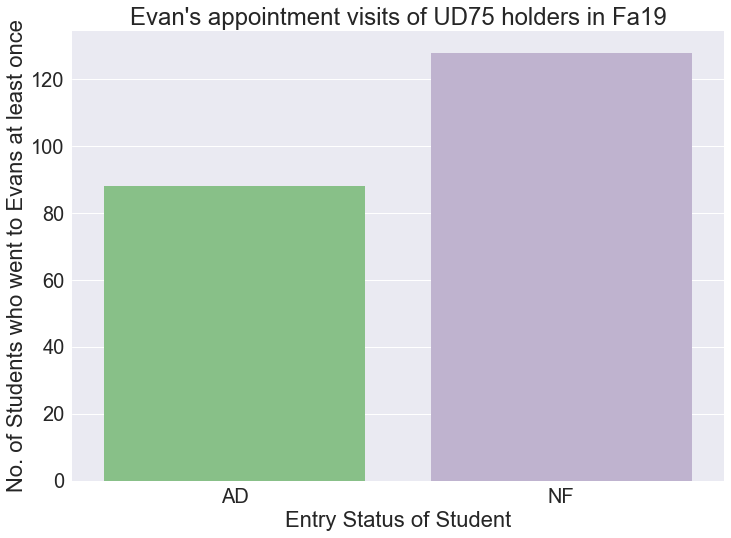

In [20]:
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.countplot(x = 'Entry Status Cd', data = fa_19_clean[fa_19_clean['Evans']], palette = 'Accent', order = ['AD', 'NF'])
ax.set(xlabel='Entry Status of Student', ylabel='No. of Students who went to Evans at least once', title = 'Evan\'s appointment visits of UD75 holders in Fa19')
pyplot.show()

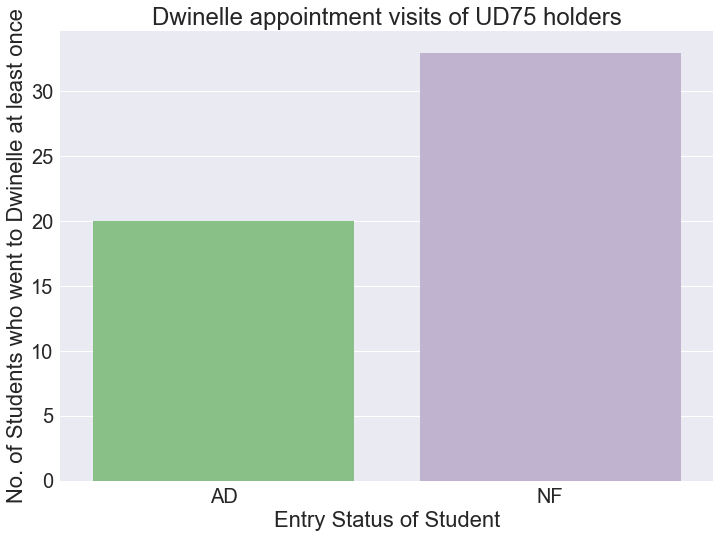

In [21]:
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.countplot(x = 'Entry Status Cd', data = fa_19_clean[fa_19_clean['Dwinelle']], palette = 'Accent', order = ['AD', 'NF'])
ax.set(xlabel='Entry Status of Student', ylabel='No. of Students who went to Dwinelle at least once', title = 'Dwinelle appointment visits of UD75 holders')
pyplot.show()

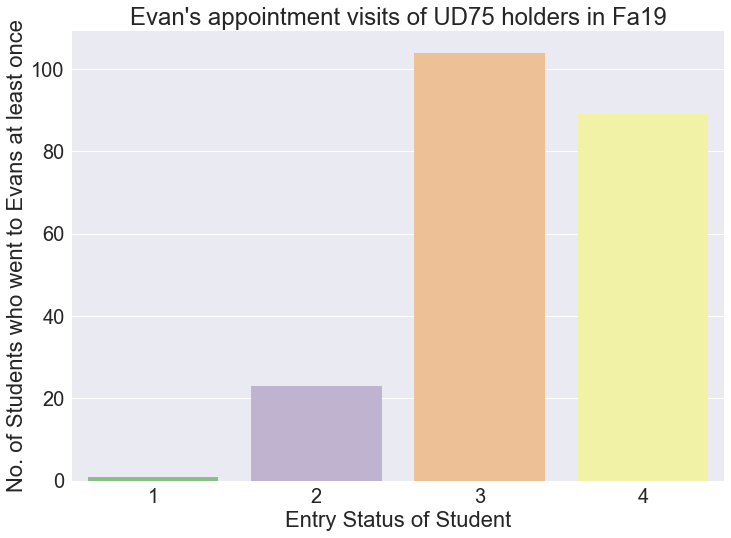

In [22]:
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.countplot(x = 'Educ Non Exam Level Cd', data = fa_19_clean[fa_19_clean['Evans']], palette = 'Accent', order = [1, 2, 3, 4])
ax.set(xlabel='Entry Status of Student', ylabel='No. of Students who went to Evans at least once', title = 'Evan\'s appointment visits of UD75 holders in Fa19')
pyplot.show()

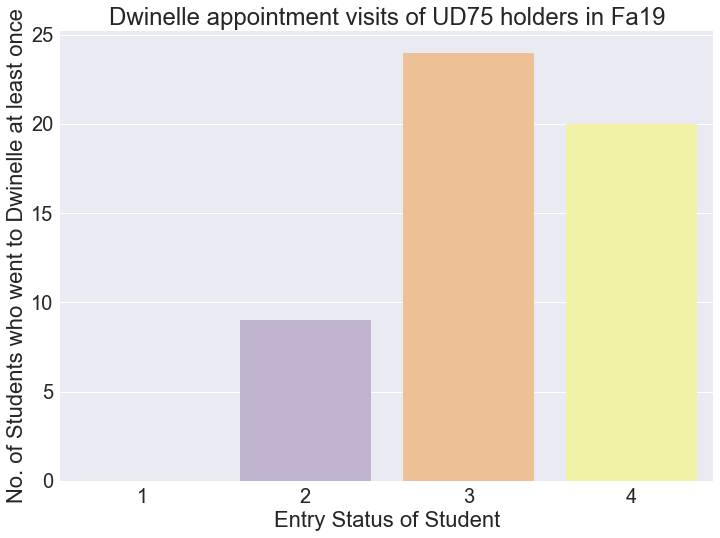

In [23]:
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.countplot(x = 'Educ Non Exam Level Cd', data = fa_19_clean[fa_19_clean['Dwinelle']], palette = 'Accent', order = [1, 2, 3, 4])
ax.set(xlabel='Entry Status of Student', ylabel='No. of Students who went to Dwinelle at least once', title = 'Dwinelle appointment visits of UD75 holders in Fa19')
pyplot.show()

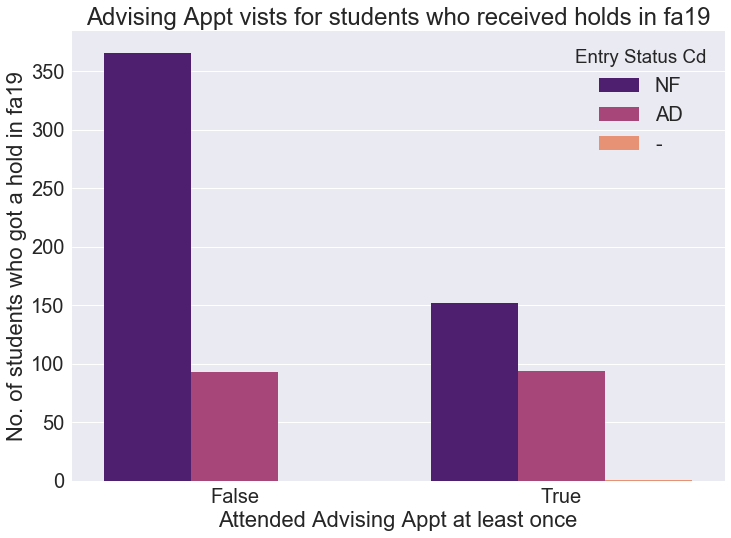

In [24]:
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.countplot(x = 'Attended Advising Appt', hue = 'Entry Status Cd', data = fa_19_clean, palette = 'magma')
ax.set(xlabel='Attended Advising Appt at least once', ylabel='No. of students who got a hold in fa19', title = 'Advising Appt vists for students who received holds in fa19')
pyplot.show()

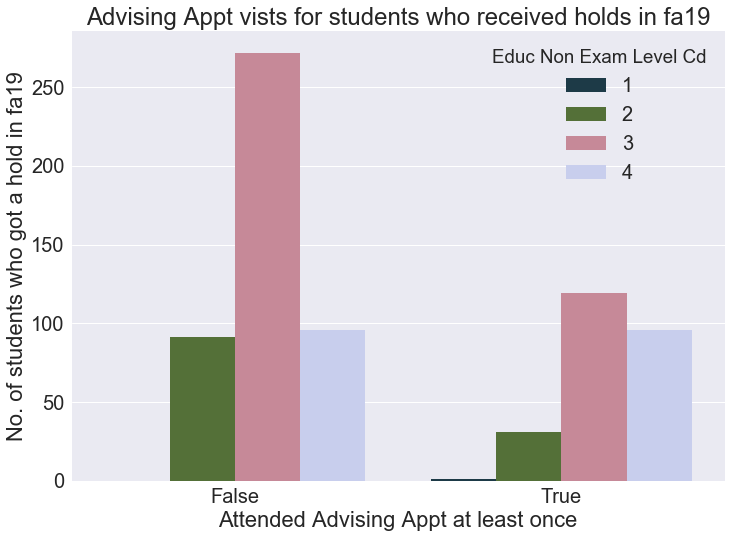

In [25]:
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.countplot(x = 'Attended Advising Appt', hue = 'Educ Non Exam Level Cd', data = fa_19_clean, palette = 'cubehelix')
ax.set(xlabel='Attended Advising Appt at least once', ylabel='No. of students who got a hold in fa19', title = 'Advising Appt vists for students who received holds in fa19')
pyplot.show()

In [26]:
senior_ad_visit = fa_19_clean[(fa_19_clean['Educ Non Exam Level Cd'] == 4) & (fa_19_clean['Attended Advising Appt'] == True)].iloc[:,[6, 7, 8, 9]]
senior_ad_no_visit = fa_19_clean[(fa_19_clean['Educ Non Exam Level Cd'] == 4) & (fa_19_clean['Attended Advising Appt'] == False)].iloc[:,[6, 7, 8, 9]]

In [27]:
senior_ad_visit

,Cum Gpa No,Cum Ucb Letgrd Units No,Eot Term Letgrd Units Complete,Eot Term Pnp Units Completed
5,1.866,46.0,7.0,NaN
6,2.688,18.0,2.0,1.0
15,2.367,74.0,13.0,NaN
16,1.832,62.5,9.0,NaN
20,2.708,68.0,NaN,NaN
...,...,...,...,...
1279,0.000,0.0,NaN,NaN
1288,2.168,31.0,9.0,NaN
1303,2.775,40.0,11.0,2.0
1309,2.614,41.0,14.0,NaN


C:\Users\viraj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\viraj\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\viraj\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


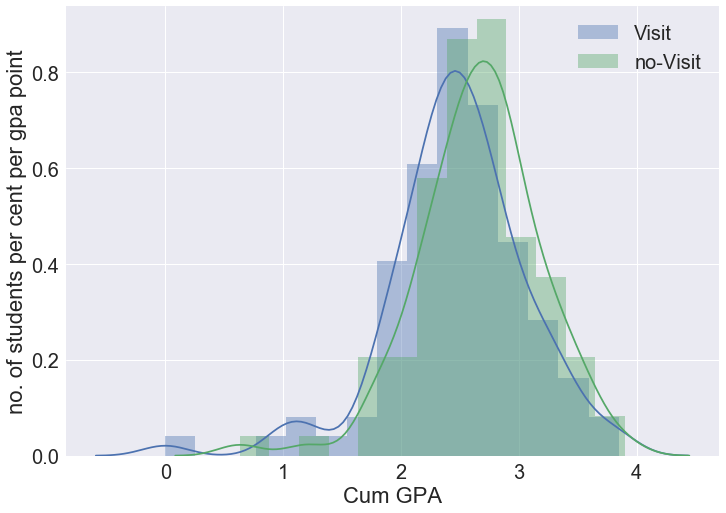

mean_gpa_visit =  2.4759791666666677
mean_gpa_no_visit =  2.6628541666666665


In [28]:
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.distplot(senior_ad_visit['Cum Gpa No'], label = 'Visit')
sns.distplot(senior_ad_no_visit['Cum Gpa No'], label = 'no-Visit')
ax.set(xlabel='Cum GPA', ylabel='no. of students per cent per gpa point')
pyplot.legend()
pyplot.show()

print('mean_gpa_visit = ', np.mean(senior_ad_visit['Cum Gpa No']))
print('mean_gpa_no_visit = ', np.mean(senior_ad_no_visit['Cum Gpa No']))

C:\Users\viraj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\viraj\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\viraj\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


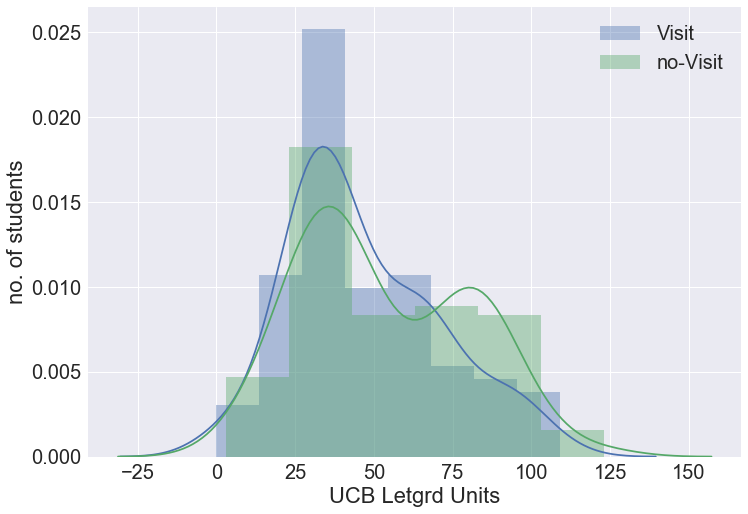

mean_units_visit =  46.918749999999996
mean_units_no_visit =  53.411458333333336


In [29]:
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.distplot(senior_ad_visit['Cum Ucb Letgrd Units No'], label = 'Visit')
sns.distplot(senior_ad_no_visit['Cum Ucb Letgrd Units No'], label = 'no-Visit')
ax.set(xlabel='UCB Letgrd Units', ylabel='no. of students')
pyplot.legend()
pyplot.show()

print('mean_units_visit = ', np.mean(senior_ad_visit['Cum Ucb Letgrd Units No']))
print('mean_units_no_visit = ', np.mean(senior_ad_no_visit['Cum Ucb Letgrd Units No']))

In [30]:
advising_visits = fa_19_clean.groupby(['Attended Advising Appt', 'Educ Non Exam Level Cd']).count()
advising_visits['count'] = advising_visits['Unnamed: 0']
advising_visits['apt'] = [x[0] for x in advising_visits.index]
advising_visits['lvl'] = [x[1] for x in advising_visits.index]
advising_visits.index = np.arange(0, 7)
advising_visits = advising_visits.loc[:,['apt', 'lvl', 'count']]

In [31]:
advising_visits['pct'] = [advising_visits.loc[i, 'count'] / (advising_visits.loc[i, 'count'] + advising_visits.loc[i+4, 'count']) for i in np.arange(3)] + [0] + [advising_visits.loc[i, 'count'] / (advising_visits.loc[i, 'count'] + advising_visits.loc[i-4, 'count']) for i in np.arange(4, 7)]
advising_visits

,apt,lvl,count,pct
0,False,2,91,0.745902
1,False,3,272,0.695652
2,False,4,96,0.500000
3,True,1,1,0.000000
4,True,2,31,0.254098
5,True,3,119,0.304348
6,True,4,96,0.500000


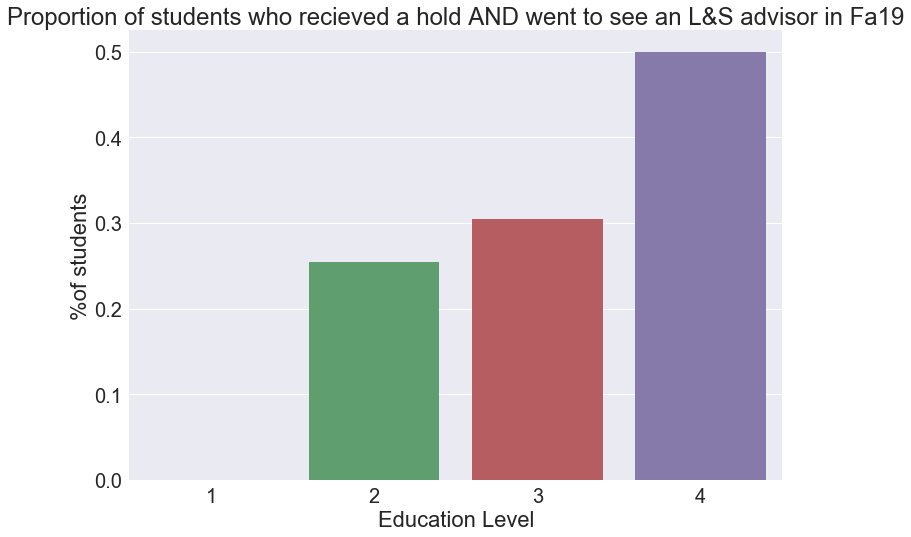

In [32]:
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.barplot(x = 'lvl', y = 'pct', data = advising_visits.loc[3:, :])
ax.set(xlabel='Education Level', ylabel='%of students', title = 'Proportion of students who recieved a hold AND went to see an L&S advisor in Fa19')
pyplot.show()

In [33]:
fa_19_withdrew = fa_19[[(sid in list(fa_19_nomajor['SID'])) for sid in fa_19['Student Id']]]
fa_19_withdrew

,Unnamed: 0,Semester Year Name Concat,Student Id,Entry Status Cd,Educ Non Exam Level Cd,Academic Department Short Nm - Major,Cum Gpa No,Cum Ucb Letgrd Units No,Eot Term Letgrd Units Complete,Eot Term Pnp Units Completed,Eot Trm Tot Letgrd Grd Pnts No
3,3,2019 Fall,ea4fd7468e7b05b103cabe4aabf432ff0000892a8d1e0c...,NF,2,-,2.188,41.0,NaN,NaN,NaN
45,45,2019 Fall,2865351fcf700e1a98fdd7274e21cbec8bb42eb2e216d5...,NF,3,-,3.097,48.0,NaN,NaN,NaN
56,56,2019 Fall,1ea8012a519289caca0564ed41ab1e97ae25b5208306fa...,NF,3,-,2.636,61.0,NaN,NaN,NaN
80,80,2019 Fall,c4af2fe59423d4656dccd5630708e5c5ae556ffebf636c...,AD,4,-,2.366,12.0,NaN,NaN,NaN
186,186,2019 Fall,398e1318eceb768f7d20aab63d60687ea6bdf67df079d9...,NF,4,-,2.136,58.0,NaN,NaN,NaN
306,306,2019 Fall,9b1161b6bbf2009bcfd6040ee98efe4fa92dc09c69de72...,NF,3,-,2.627,68.0,NaN,NaN,NaN
974,974,2019 Fall,8ce1935b32272c8915a585b120a072f76d50872a8152cc...,AD,4,-,3.215,39.0,NaN,NaN,NaN
994,994,2019 Fall,17185c39651055885fd7107b54119a7f3c81b7ccb0415f...,AD,4,-,3.650,8.0,NaN,NaN,NaN
1060,1060,2019 Fall,df5e152070aeb91635035f2aa88eb14bbf0cd715a943b5...,AD,4,-,1.452,9.0,NaN,NaN,NaN
1115,1115,2019 Fall,076d417fddc1ca5d17c23a464f632b430ca86ead10294e...,AD,4,-,2.304,19.0,NaN,NaN,NaN


In [34]:
x = fa_19[[(sid not in list(fa_19_allls['SID'])) for sid in fa_19['Student Id']]]
cns_holds_fa_19 = x[[(sid not in list(fa_19_withdrew['Student Id'])) for sid in x['Student Id']]]
cns_holds_fa_19

,Unnamed: 0,Semester Year Name Concat,Student Id,Entry Status Cd,Educ Non Exam Level Cd,Academic Department Short Nm - Major,Cum Gpa No,Cum Ucb Letgrd Units No,Eot Term Letgrd Units Complete,Eot Term Pnp Units Completed,Eot Trm Tot Letgrd Grd Pnts No
110,110,2019 Fall,a763fb396212126c3ca6cafa1d8b49e4498848174f0a04...,NF,4,"Env Sci, Policy, & Mgmt",3.106,73.0,7.5,NaN,25.2
168,168,2019 Fall,27e699b9a2d4353a09669a12140ed9f69a6f685fd1d2ce...,AD,3,Ag & Resource Econ & Pol,3.227,29.0,11.0,4.0,40.0
237,237,2019 Fall,79b15dd64adb0646a36e1ba647766b065609d3c3ff3db6...,AD,3,Ag & Resource Econ & Pol,3.280,20.0,12.0,1.0,41.6
335,335,2019 Fall,4efdc7cddf701acada578b273b4830f25b9e5fa713dba9...,NF,3,Ag & Resource Econ & Pol,3.017,75.0,11.0,0.5,33.9
401,401,2019 Fall,059a3e58d087671908b4fd25c46094e8c99a47db2fe469...,NF,3,Ag & Resource Econ & Pol,3.254,71.0,15.0,NaN,55.5
440,440,2019 Fall,54c1d5479c35e4b604fc75cc9ab019890d079832874731...,NF,3,"Env Sci, Policy, & Mgmt",2.746,69.0,13.0,1.0,37.7
542,542,2019 Fall,705159e68175efdba99e03d4a2fda1427ee22f7576038d...,NF,3,Ag & Resource Econ & Pol,3.281,64.5,12.5,5.0,39.3
589,589,2019 Fall,cdc559843200527bb0e46074725a3295607ea5f3fb526a...,NF,3,"Env Sci, Policy, & Mgmt",3.351,81.0,15.0,NaN,44.1
620,620,2019 Fall,c8e81552d6b5328279a558b57e693377dbbff3cd2ee7fa...,NF,3,Ag & Resource Econ & Pol,3.222,76.0,15.0,NaN,52.4
642,642,2019 Fall,6cd9074e3d17bfcb77e51f64c6047473beef6de8511e9e...,NF,3,Nutritional Sciences & Tox,3.129,67.0,13.0,NaN,38.9


In [35]:
fa_19_clean_all = fa_19[[((sid not in list(fa_19_withdrew['Student Id'])) and (sid not in list(cns_holds_fa_19['Student Id']))) for sid in fa_19['Student Id']]]

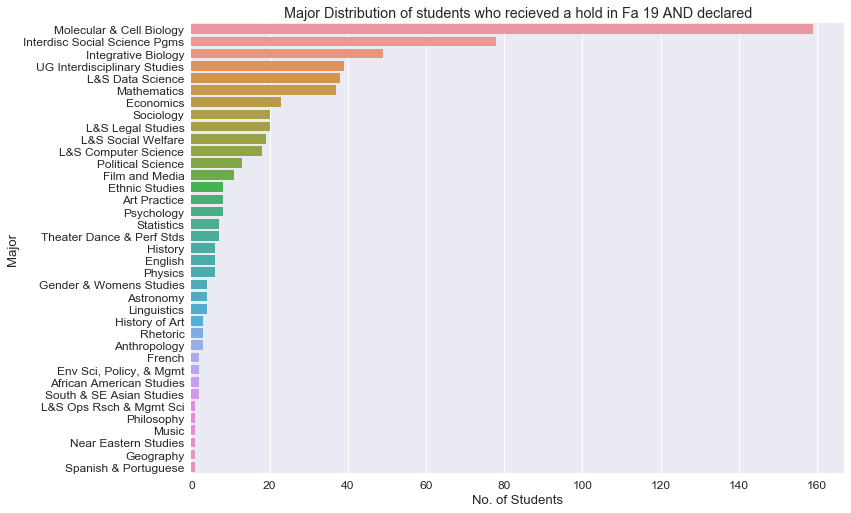

In [36]:
majors = pd.DataFrame(fa_19_clean_all['Academic Department Short Nm - Major'].value_counts())
majors['major'] = majors.index
majors.columns = ['count', 'major']

sns.set(font_scale = 1.2)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.barplot(x = 'count', y = 'major', data = majors.iloc[1:,:])
ax.set(ylabel='Major', xlabel='No. of Students', title = 'Major Distribution of students who recieved a hold in Fa 19 AND declared')
pyplot.show()

In [37]:
fa_19_declared = fa_19_clean_all[fa_19_clean_all['Academic Department Short Nm - Major'] != 'L&S Undeclared']
fa_19_undeclared = fa_19_clean_all[(fa_19_clean_all['Academic Department Short Nm - Major'] == 'L&S Undeclared')] 

In [38]:
print("number of students who declare = ", fa_19_declared.shape[0])
print("number of students who DONT declare = ", fa_19_undeclared.shape[0])
print("percent of studnets who declare = ", round((fa_19_declared.shape[0]*100)/(fa_19_declared.shape[0] + fa_19_undeclared.shape[0]), 2))

number of students who declare =  615
number of students who DONT declare =  706
percent of studnets who declare =  46.56


C:\Users\viraj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\viraj\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\viraj\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


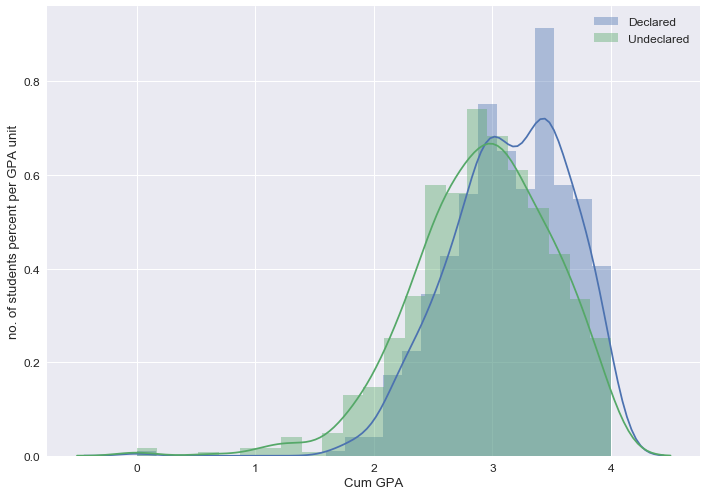

mean_undeclared_gpa =  2.9194050991501395
mean_declared_gpa =  3.1444211382113822


In [39]:
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.distplot(fa_19_declared['Cum Gpa No'], label = 'Declared')
sns.distplot(fa_19_undeclared['Cum Gpa No'], label = 'Undeclared')
ax.set(xlabel='Cum GPA', ylabel='no. of students percent per GPA unit')
pyplot.legend()
pyplot.show()

print('mean_undeclared_gpa = ', np.mean(fa_19_undeclared['Cum Gpa No']))
print('mean_declared_gpa = ', np.mean(fa_19_declared['Cum Gpa No']))

C:\Users\viraj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\viraj\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\viraj\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


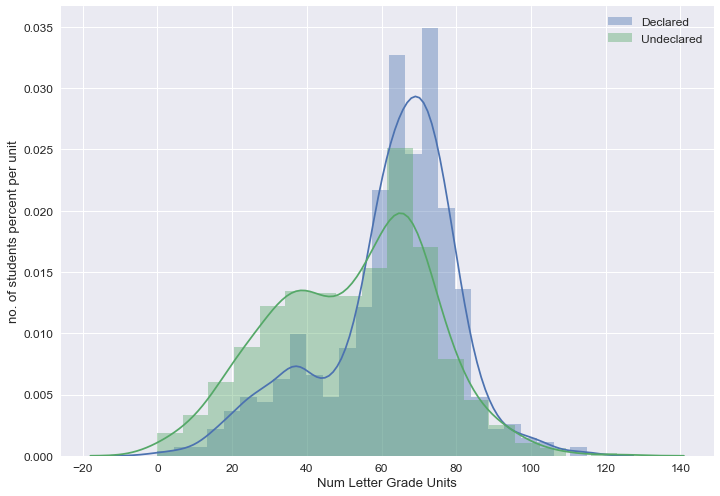

mean_undeclared_letgrd_units =  52.29107648725213
mean_declared_letgrd_units =  62.18243902439024


In [40]:
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.distplot(fa_19_declared['Cum Ucb Letgrd Units No'], label = 'Declared')
sns.distplot(fa_19_undeclared['Cum Ucb Letgrd Units No'], label = 'Undeclared')
ax.set(xlabel='Num Letter Grade Units', ylabel='no. of students percent per unit')
pyplot.legend()
pyplot.show()

print('mean_undeclared_letgrd_units = ', np.mean(fa_19_undeclared['Cum Ucb Letgrd Units No']))
print('mean_declared_letgrd_units = ', np.mean(fa_19_declared['Cum Ucb Letgrd Units No']))

C:\Users\viraj\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\viraj\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


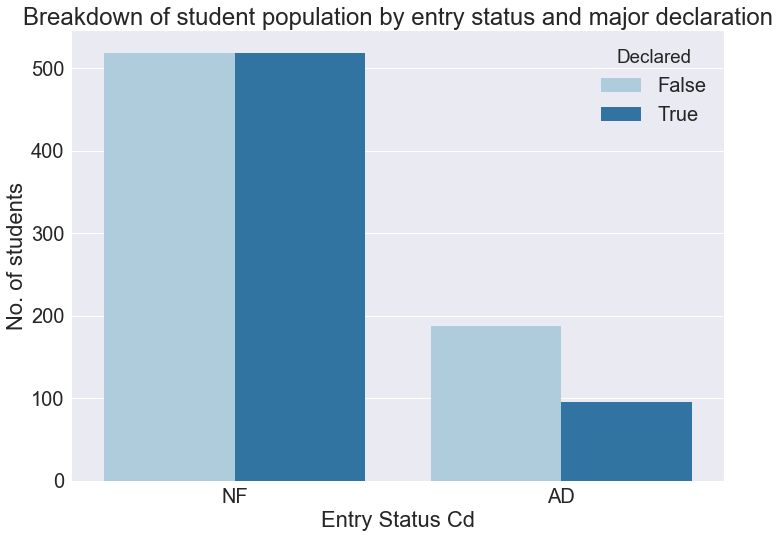

In [41]:
fa_19_clean_all['Declared'] = [(sid in list(fa_19_declared['Student Id'])) for sid in fa_19_clean_all['Student Id']]
fa_19_clean_all['Entry Status(Numeric)'] = (fa_19_clean_all['Entry Status Cd'] == 'AD').apply(int)

sns.set(font_scale = 2)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.countplot(x = 'Entry Status Cd', hue = 'Declared', data = fa_19_clean_all, palette = 'Paired', order = ['NF', 'AD'])
ax.set(xlabel='Entry Status Cd', ylabel='No. of students', title = 'Breakdown of student population by entry status and major declaration')
pyplot.show()

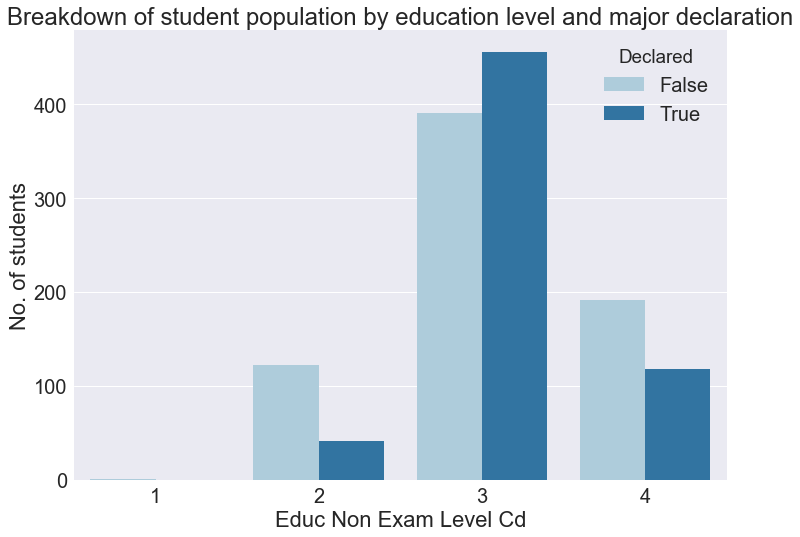

In [42]:
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.countplot(x = 'Educ Non Exam Level Cd', hue = 'Declared', data = fa_19_clean_all, palette = 'Paired', order = [1, 2, 3, 4])
ax.set(xlabel='Educ Non Exam Level Cd', ylabel='No. of students', title = 'Breakdown of student population by education level and major declaration')
pyplot.show()

In [43]:
fa_19_clean_all = fa_19_clean_all[(fa_19_clean_all['Declared'] == 1) | (fa_19_clean_all['Declared'] == 0)]

In [44]:
fa_19_clean_all

,Unnamed: 0,Semester Year Name Concat,Student Id,Entry Status Cd,Educ Non Exam Level Cd,Academic Department Short Nm - Major,Cum Gpa No,Cum Ucb Letgrd Units No,Eot Term Letgrd Units Complete,Eot Term Pnp Units Completed,Eot Trm Tot Letgrd Grd Pnts No,Declared,Entry Status(Numeric)
0,0,2019 Fall,c9f7ef9bc3828ecf9b6584aa212563066170a57ab54908...,NF,3,L&S Undeclared,3.306,29.0,8.0,NaN,28.0,False,0
1,1,2019 Fall,979fbd753328c3a0543a64dfcbf7c3c117bb947faab0d1...,NF,3,UG Interdisciplinary Studies,2.463,67.0,16.0,NaN,56.0,True,0
2,2,2019 Fall,e674e936f2d4556af632147525c6075171f76b9f67f8d5...,NF,4,History,2.510,39.0,NaN,3.0,NaN,True,0
4,4,2019 Fall,03cce505c03e25957db8ad8195d80d00927e884b02ef73...,NF,4,L&S Undeclared,2.096,75.0,8.0,NaN,25.2,False,0
5,5,2019 Fall,8f8818a974aa019bc8890d4f906f1925f8ad0717d8591c...,AD,4,L&S Undeclared,1.866,46.0,7.0,NaN,19.2,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1351,1351,2019 Fall,3d6c7e42d2511aeec3a7f08121d43de8c044137da74aa4...,AD,3,Sociology,3.638,44.0,15.0,1.0,57.3,True,1
1352,1352,2019 Fall,68f847a091a65bf0b4695b23d676b1bd228f360be07968...,AD,3,L&S Undeclared,2.461,13.0,3.0,6.0,6.0,False,1
1353,1353,2019 Fall,44587860a4184da163fabbd50a85e9bec894155c3fcc59...,AD,3,L&S Undeclared,2.825,27.0,12.0,2.0,33.2,False,1
1354,1354,2019 Fall,023e91c439947796a584a1b0654aa38babba050f0ed408...,AD,3,L&S Undeclared,3.160,30.0,14.0,2.0,48.0,False,1


In [45]:
X = fa_19_clean_all.iloc[:, [4, 12]].fillna(0)                     #[4, 6, 7, 8, 9, 10, 12]
y = fa_19_clean_all['Declared']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'.format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.60
Accuracy of Logistic regression classifier on test set: 0.59


In [46]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.62
Accuracy of Decision Tree classifier on test set: 0.58


In [47]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.62
Accuracy of K-NN classifier on test set: 0.58


In [48]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.60
Accuracy of LDA classifier on test set: 0.59


In [330]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.62
Accuracy of GNB classifier on test set: 0.58


In [331]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.60
Accuracy of SVM classifier on test set: 0.59


In [337]:
fa_19_allls['Hold Received'] = [int(sid in list(fa_19_clean_all['Student Id'])) for sid in fa_19_allls['SID']]
fa_19_allls = fa_19_allls[(fa_19_allls['Entry Status Cd'] == 'AD') |
                          (fa_19_allls['Entry Status Cd'] == 'NF') &
                          (fa_19_allls['Educ Non Exam Level Cd'] != '-')]
fa_19_allls

,Unnamed: 0,SID,Academic Department Short Nm - Major,Cum Total Units Less Exam No,Cum Total Letgrd Grade Pnts No,Cum Ucb Letgrd Units No,Cum Total Letgrd Attempted No,Cum Pnp Units No,Withdrawal Reason Eff Dt,Educ Non Exam Level Cd,Entry Status Cd,Cum Transfer Units No,Cum Gpa No,Term Gpa No,Term Total Units Attempted No,Term Letgrd Units Attempted No,Eot Term Total Units Completed,Eot Term Letgrd Units Complete,Eot Term Pnp Units Completed,Hold Received
0,0,4a6fa892f281526735cc46ffa24f2623f2e8b436ee8767...,UG Interdisciplinary Studies,149.50,282.40,96.0,134.0,9.0,NaN,4,AD,44.50,2.107,0.000,7.0,NaN,NaN,NaN,NaN,0
1,1,909f501321de55d40ab4c4c7683d2737af9f8e4c0bd4e9...,Physics,186.80,288.16,99.8,114.8,24.0,NaN,4,NF,63.00,2.510,2.828,13.0,7.0,13.0,7.0,6.0,0
2,2,873070fdacb64e6d39562dc8f94a5ebebe3053ad8b9d48...,Sociology,124.00,164.30,66.0,70.0,1.0,NaN,2,NF,57.00,2.347,2.547,22.0,21.0,22.0,21.0,1.0,0
3,3,81b3a8c2fec32350f316d5885a84f97e3ddd50019353e4...,History,99.00,141.90,41.0,41.0,5.0,NaN,2,AD,53.00,3.460,3.766,13.0,12.0,13.0,12.0,1.0,0
4,4,c9f7ef9bc3828ecf9b6584aa212563066170a57ab54908...,L&S Undeclared,66.00,95.90,29.0,29.0,0.0,NaN,3,NF,37.00,3.306,3.500,8.0,8.0,8.0,8.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25642,25642,63aa9f3676de99b49cd6f4d1437d58431f1f80081d789d...,L&S Undeclared,13.00,43.10,11.0,11.0,2.0,NaN,1,NF,0.00,3.918,3.918,13.0,11.0,13.0,11.0,2.0,0
25643,25643,e7b1abca3f928b43b8e00e8e3249e6705c123ca4fc4e18...,L&S Undeclared,15.00,28.80,10.0,10.0,5.0,NaN,1,NF,0.00,2.880,2.880,15.0,10.0,15.0,10.0,5.0,0
25644,25644,ed5093bff134178caafd2bc7576d1e4450adac366bd193...,L&S Undeclared,76.00,28.80,11.0,11.0,5.0,NaN,3,AD,60.00,2.618,2.618,16.0,11.0,16.0,11.0,5.0,0
25645,25645,06e570f35a9e7397fe171fa8735f897d5f13748c41591a...,Integrative Biology,55.86,201.07,15.0,53.9,2.0,NaN,3,AD,38.86,3.733,3.533,17.0,15.0,17.0,15.0,2.0,0


In [348]:
X = fa_19_allls.iloc[:, [3, 4, 5, 6, 7, 11, 12, 13, 14, 15, 16, 17, 18]].fillna(0)    #[3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18]
y = fa_19_allls['Hold Received']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'.format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.95
Accuracy of Logistic regression classifier on test set: 0.95


In [349]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.93


In [350]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.95
Accuracy of K-NN classifier on test set: 0.94


In [351]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.94
Accuracy of LDA classifier on test set: 0.94


C:\Users\viraj\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [352]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.92
Accuracy of GNB classifier on test set: 0.92


In [353]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.95
Accuracy of SVM classifier on test set: 0.95
